In [3]:
%matplotlib inline

import urllib2
import pandas as pd
import matplotlib.pyplot as plt
from lxml import etree


In [6]:
def try_make_number(s):
    try:
        s = int(s) # for int, long, float and complex
    except ValueError:
        return s
    return s

def xml_to_pandas(xml_web_address):
    xml_in = urllib2.urlopen(data_path).read()
    
    root = etree.fromstring(xml_in)
    parents = root.getchildren()[0].getchildren()

    names = [p.tag for p in parents]
    table = [ [try_make_number(p.text) for p in row.getchildren()] 
                      for row in root.getchildren()]
    
    return  pd.DataFrame(table, columns=names)

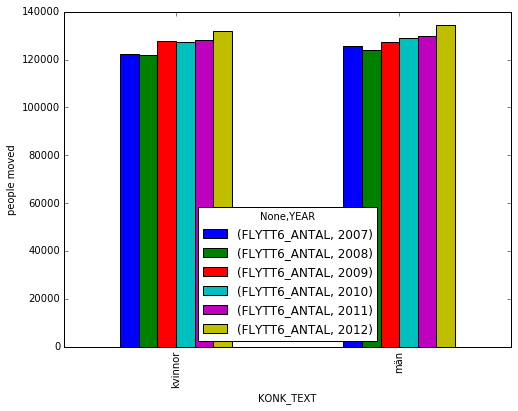

In [8]:
### SIMPLE READ
data_path = 'http://data.stockholm.se/set/Befolkning/Flyttningar/?apikey=S8O2CD27J2K4EE55CED0L0J5H81A1902'
df = xml_to_pandas(data_path)
#print df.head

### simple plot 
# 1. aggregate
df2 = df[['YEAR','KONK_TEXT','FLYTT6_ANTAL']].groupby(['YEAR','KONK_TEXT']).sum()

# 2. plot
# See http://stackoverflow.com/questions/28293028/plotting-grouped-data-in-same-plot-using-pandas
fig, ax = plt.subplots(figsize=(8,6))

# See http://stackoverflow.com/questions/25386870/pandas-plotting-with-multi-index
df2.unstack(level=0).plot(kind='bar',ax=ax)
plt.ylabel('people moved')

plt.show()
